## Problem Statement & Objective
We have been provided with two datasets, one comprises information about Orders and the second one comprises of information about Customers.
1. We have to perform Analysis on the Orders Data and Customer Data while touching upon monthly revenues, users, monthly revenue per user etc.
2. We have to prepare an analysis showing how many users placed a Purchase order, while how many actually converted bifurcated by
    - Month
    - Customer Profession
3. We have prepare a 'COHORT analysis' showing the purchase pattern of users by month

## Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [4]:
# Reading Csv Data into Pandas Dataframes for further Data Manipulations
df_customer = pd.read_csv("Case_Study_Customer_Data.csv")
df_order = pd.read_csv("Case_Study_Orders_Data.csv")

In [6]:
# Viewing the Data 
print("Customer Data:")
print(df_customer.head(10))

print("Order Data:")
print(df_order.head(10))

Customer Data:
    Cust Id  Customer Created Date     Week     Cust Profession
0  6X894534  01 Jan, 2021 00:23:41  W1,2021     Insurance Agent
1  8WTK1802  01 Jan, 2021 01:16:11  W1,2021  Sales Professional
2  0WWO4742  01 Jan, 2021 06:19:00  W1,2021      Small Merchant
3  V4OO4168  01 Jan, 2021 06:32:11  W1,2021       Finance Agent
4  Z8EA4622  01 Jan, 2021 08:42:21  W1,2021   BFSI Professional
5  P3P11239  01 Jan, 2021 10:59:06  W1,2021       Finance Agent
6  DVU07776  01 Jan, 2021 12:06:53  W1,2021  Sales Professional
7  IMEE2234  01 Jan, 2021 12:36:04  W1,2021  Sales Professional
8  347L3208  01 Jan, 2021 12:46:06  W1,2021      Small Merchant
9  7TG30409  01 Jan, 2021 13:06:58  W1,2021   BFSI Professional
Order Data:
       Order No   Cust ID        Order Date Order Status  Order Amount
0  4.260000e+18  6X894534  2001-01-21 00:36        Other           NaN
1  4.260000e+18  0WWO4742  2001-01-21 06:24        Other           NaN
2  4.260000e+18  V4OO4168  2001-01-21 06:47        Other

## Data Cleaning & Feature Engineering 

In [10]:
# Checking for Missing/Null Values 
print("Customer Data Missing Values:")
print(df_customer.isnull().sum())
print("\n")
print("Order Data Missing Values:")
print(df_order.isnull().sum())

Customer Data Missing Values:
Cust Id                   0
Customer Created Date     0
Week                      0
Cust Profession          42
dtype: int64


Order Data Missing Values:
Order No            0
Cust ID             0
Order Date          0
Order Status        0
Order Amount    25920
dtype: int64


In [23]:
# In order to maintain the Data Integrity and accuracy in further analysis, and to avoid certain bias later; 
# We will replace the Null values in the Cust Profession Column with 'Others'.
df_customer['Cust Profession'].fillna('Other', inplace=True)

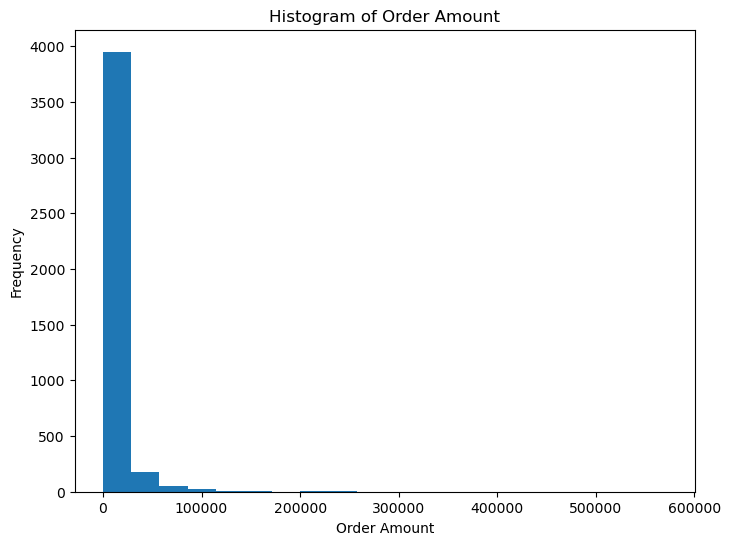

Max Order Amount: 571698.0
Min Order Amount: 0.0
Mean Order Amount: 8125.367598294647
Median Order Amount: 1581.5


In [25]:
# Visualising Outliers in Order amount to avoid biasing
plt.figure(figsize=(8, 6))
plt.hist(df_order['Order Amount'], bins=20)
plt.title('Histogram of Order Amount')
plt.xlabel('Order Amount')
plt.ylabel('Frequency')
plt.show()

# Checking the MAX and MIN values in Order Amount
max_order_amount = df_order['Order Amount'].max()
min_order_amount = df_order['Order Amount'].min()
print("Max Order Amount:", max_order_amount)
print("Min Order Amount:", min_order_amount)

# Calculating Mean for Order Amount
mean_order_amount = df_order['Order Amount'].mean()
print("Mean Order Amount:", mean_order_amount)

# Calculating the Median for Order Amount
median_order_amount = df_order['Order Amount'].median()
print("Median Order Amount:", median_order_amount)

In [26]:
# Since Extemely high values in Order amount could disproportionately influence the mean.
# We will impute the NUll values in the Order amount with Median.
df_order['Order Amount'].fillna(median_order_amount, inplace=True)

In [27]:
# Validating the Null Values
print("Customer Data Missing Values:")
print(df_customer.isnull().sum())
print("\n")
print("Order Data Missing Values:")
print(df_order.isnull().sum())

Customer Data Missing Values:
Cust Id                  0
Customer Created Date    0
Week                     0
Cust Profession          0
dtype: int64


Order Data Missing Values:
Order No        0
Cust ID         0
Order Date      0
Order Status    0
Order Amount    0
dtype: int64


In [41]:
# Datetime Formatting
df_customer['Customer Created Date'] = pd.to_datetime(df_customer['Customer Created Date'], format='%m%d%Y %H:%M:%S' )
df_order['Order Date'] = pd.to_datetime(df_order['Order Date'], format='%m%d%Y %H:%M:%S') 
print(df_customer['Customer Created Date'].head(5))
print(df_order['Order Date'].head(5))

0   2021-01-01 00:23:41
1   2021-01-01 01:16:11
2   2021-01-01 06:19:00
3   2021-01-01 06:32:11
4   2021-01-01 08:42:21
Name: Customer Created Date, dtype: datetime64[ns]
0   2001-01-21 00:36:00
1   2001-01-21 06:24:00
2   2001-01-21 06:47:00
3   2001-01-21 06:51:00
4   2001-01-21 09:02:00
Name: Order Date, dtype: datetime64[ns]


In [42]:
# Since we need to prepare Analysis on the Orders Data and Customer Data while touching upon monthly revenues, users, monthly revenue per user etc.
# We would need to create new features in our dataset for 'MONTH' 
df_customer['Month'] = df_customer['Customer Created Date'].dt.to_period('M')
df_order['Month'] = df_order['Order Date'].dt.to_period('M')
print(df_customer['Month'].head(5))
print(df_order['Month'].head(5))

0    2021-01
1    2021-01
2    2021-01
3    2021-01
4    2021-01
Name: Month, dtype: period[M]
0    2001-01
1    2001-01
2    2001-01
3    2001-01
4    2001-01
Name: Month, dtype: period[M]
